In [2]:
import seaborn as sns
# import pandas as pd
import pandas; print(pandas.__version__)


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# For data processing
import numpy as np
import pandas as pd
import scipy.stats as stats

# For API usage
import requests as r

# For progress bar
from tqdm import tqdm

from sklearn.cluster import MiniBatchKMeans
import random


/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


1.5.3


In [3]:
numerical_data = pd.read_csv('cleaned_1015.csv', usecols = ['BUDGET', 'VOTE_AVERAGE', 'REVENUE'])
numerical_data.info()
numerical_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6971 entries, 0 to 6970
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VOTE_AVERAGE  6971 non-null   float64
 1   BUDGET        6971 non-null   int64  
 2   REVENUE       6971 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 163.5 KB


VOTE_AVERAGE    0
BUDGET          0
REVENUE         0
dtype: int64

In [4]:
numerical_data.head()

,VOTE_AVERAGE,BUDGET,REVENUE
0,7.6,237000000,2920357254
1,8.3,356000000,2799439100
2,7.7,460000000,2293000000
3,7.9,200000000,2187463944
4,7.3,245000000,2068223624


<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

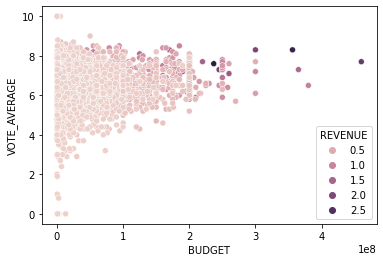

In [5]:
sns.scatterplot(data = numerical_data, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = 'REVENUE')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(numerical_data[['BUDGET', 'VOTE_AVERAGE']], numerical_data[['REVENUE']], test_size=0.33, random_state=0)

X_train

In [7]:
X_train.isnull().sum()

BUDGET          0
VOTE_AVERAGE    0
dtype: int64

In [8]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_train)

KMeans(n_clusters=3)

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

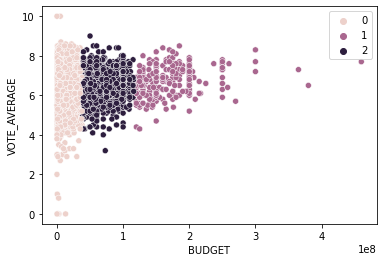

In [9]:
sns.scatterplot(data = X_train, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = kmeans.labels_) #labels/hues indicate the different clusters

# We can evaluate performance of the clustering algorithm using a Silhouette score which is a part of sklearn.metrics where a lower score represents a better fit.

In [10]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train, kmeans.labels_, metric='euclidean')

0.6774836957122127

# We create the below loop to test and store different model results so that we can make a decision on the best number of clusters.

In [24]:
K = range(2, 11)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k).fit(X_train)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train, model.labels_, metric='euclidean'))

# for 2 clusters

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

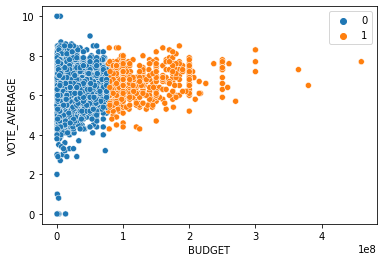

In [25]:
sns.scatterplot(data = X_train, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = fits[0].labels_)

# for 4 clusters

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

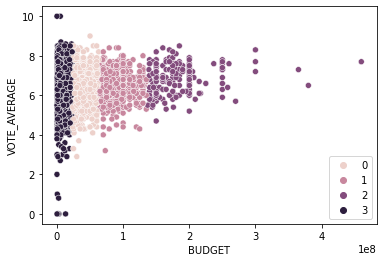

In [26]:
sns.scatterplot(data = X_train, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = fits[2].labels_)

# for 6 clusters

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

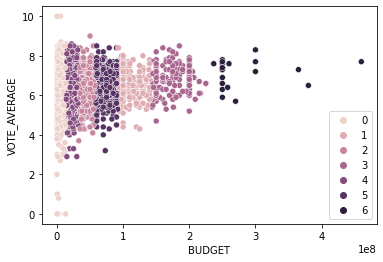

In [27]:
sns.scatterplot(data = X_train, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = fits[5].labels_)

# for 8 clusters

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

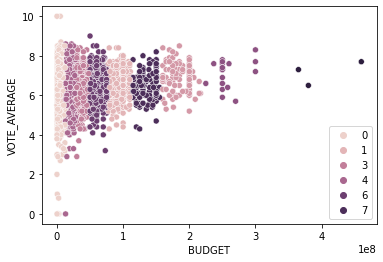

In [28]:
sns.scatterplot(data = X_train, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = fits[7].labels_)

# for 9 clusters

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

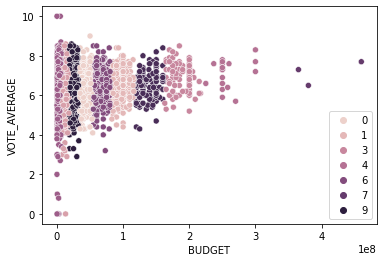

In [30]:
sns.scatterplot(data = X_train, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = fits[8].labels_)

<Axes: >

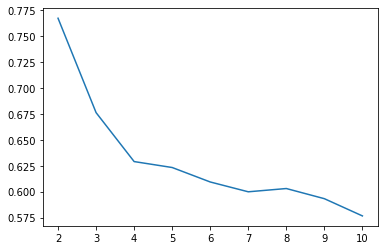

In [31]:
sns.lineplot(x = K, y = score)

# Hence we typically choose the point where the improvements in performance start to flatten or get worse. We see k = 4 is probably the best we can do without overfitting. 

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

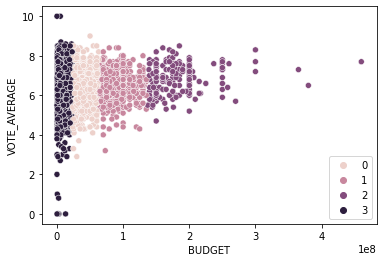

In [33]:
sns.scatterplot(data = X_train, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = fits[2].labels_)

# Inference: 
# we can see that for lower budget and